In [36]:
# Required Libraries (Some are custom and given in the repository)
import torch
import torchvision
from torchvision import models
import numpy as np
import pandas as pd
import torch.nn as nn
from torchsummary import summary
import engine
import dataset_prep
import predict

In [37]:
# Configurations
torch.manual_seed(1)
np.random.seed(300)
BATCH_SIZE = 32
EPOCHS = 5
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
TRAINING_FILE = '/media/levi/OS/Users/sumit/Desktop/Explicit Content Classifier/Input/train/'
TESTING_FILE = '/media/levi/OS/Users/sumit/Desktop/Explicit Content Classifier/Input/test/'
OUT = '/media/levi/OS/Users/sumit/Desktop/Explicit Content Classifier/Output/'
LEARNING_RATE = 0.0001
N_CLASSES = 5

In [38]:
# Data Loader
train_loader, val_loader = dataset_prep.tr_dataset(batch_size = BATCH_SIZE)

Classes :  {'Drawing': 0, 'Hentai': 1, 'Neutral': 2, 'Porn': 3, 'Sexy': 4}


In [39]:
# Resnet50
def resnet_model_50():

    resnet = models.resnet50(pretrained = True)

    # Already Trained Parameters will not train
    for param in resnet.parameters():
        param.requires_grad = False

    in_features = resnet.fc.in_features

    # Changing the last layer according to the classes
    fc = nn.Linear(in_features = in_features, out_features = N_CLASSES)
    resnet.fc = fc

    summary(resnet.to(DEVICE), input_size = (3, 224, 224))

    return (resnet)

In [40]:
# # Resnet101
# resnet = models.resnet101(pretrained = True)

# # Already Trained Parameters will not train
# for param in resnet.parameters():
#     param.requires_grad = False

# in_features = resnet.fc.in_features

# # Changing the last layer according to the classes
# fc = nn.Linear(in_features = in_features, out_features = config.N_CLASSES)
# resnet.fc = fc

# summary(resnet.to(config.DEVICE), input_size = (3, 224, 224))

In [41]:
model_load = resnet_model_50()
model_load.to(config.DEVICE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

NameError: name 'config' is not defined

In [21]:
# Training
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_load.parameters(), lr = LEARNING_RATE)

trained_model, train_losses, val_losses = engine.training_func(model_load, train_loader, val_loader,
                                                               EPOCHS, DEVICE, optimizer, criterion)

In [42]:
# torch.save(trained_model.state_dict(), OUT + 'resnet50_e5_0.0001.pth')

In [ ]:
# Loss Curve
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [43]:
# Predictions
pred, lab = predict.predict_resnet(TESTING_FILE, DEVICE, model_name = 'Resnet50_e5_0.0001.pth', type = 50)

{0: 'Drawing', 1: 'Hentai', 2: 'Neutral', 3: 'Porn', 4: 'Sexy'}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256,


Accuracy :  84.090 %

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2000
           1       0.84      0.86      0.85      2000
           2       0.84      0.90      0.87      2000
           3       0.79      0.94      0.86      2000
           4       0.93      0.70      0.80      2000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



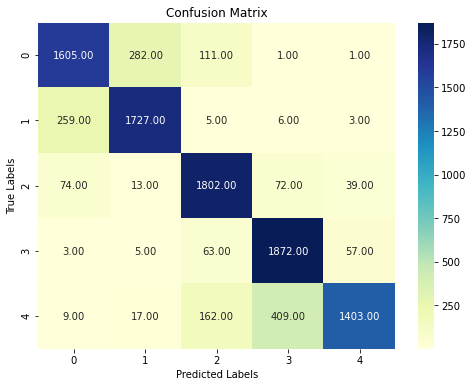

In [44]:
# Evaluation
import metrics
metrics.metric_scores(lab, pred)